In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data.csv')
print(data.shape)
data.head(3)

(1000, 3)


,shape,color,area
0,square,yellow,9409.0
1,circle,yellow,4071.5
2,triangle,blue,2028.0


In [4]:
#checking if there are any null or missing values
data[data.isnull().any(axis = 1)]

,shape,color,area


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
shape    1000 non-null object
color    1000 non-null object
area     1000 non-null float64
dtypes: float64(1), object(2)
memory usage: 23.5+ KB


In [6]:
'''
1. Draw a boxplot showing the area size distribution for each shape.
2. Calculate the mean, max, and standard deviation of the area size of each color.
3. What is the average area size of a yellow square?
4. Which shape is most likely to be green?
'''

'\n1. Draw a boxplot showing the area size distribution for each shape.\n2. Calculate the mean, max, and standard deviation of the area size of each color.\n3. What is the average area size of a yellow square?\n4. Which shape is most likely to be green?\n'

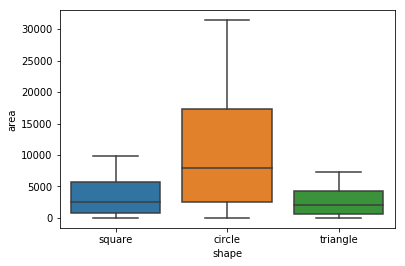

In [7]:
#1. Draw a boxplot showing the area size distribution for each shape.
sns.boxplot(x= 'shape', y ='area', data=data)  

In [8]:
#2. Calculate the mean, max, and standard deviation of the area size of each color.
for color in data['color'].unique():
    print('Descriptive Statistics of each color: ', color)
    print(data[data['color'] == color].describe())

Descriptive Statistics of each color:  yellow
               area
count    272.000000
mean    4538.208088
std     5352.460578
min        1.000000
25%     1003.675000
50%     2818.200000
75%     6271.175000
max    31415.900000
Descriptive Statistics of each color:  blue
               area
count    360.000000
mean    3208.131667
std     3039.212965
min        0.800000
25%      625.000000
50%     2500.000000
75%     5301.250000
max    21642.400000
Descriptive Statistics of each color:  red
               area
count    290.000000
mean    3815.871034
std     5092.678377
min        0.800000
25%      722.850000
50%     2436.800000
75%     5012.450000
max    31415.900000
Descriptive Statistics of each color:  green
               area
count     78.000000
mean    5761.119231
std     6695.029606
min        1.000000
25%      857.725000
50%     3844.000000
75%     7396.000000
max    27759.100000


In [9]:
#3. What is the average area size of a yellow square?
np.mean(data[['area']][(data['shape']=='square') & (data['color']=='yellow')])

area    3333.207207
dtype: float64

In [10]:
# 4. Which shape is most likely to be green?

#calculate number of each shape being green:
d = dict()
for shape in data['shape'].unique():
    d[shape] = len(data[(data['color']=='green') & (data['shape']== shape)])

#the shape with most green objects, will be the most likely:
print('Hence the shape most likely to be green is: ', max(d, key=d.get))
print('Count of all shapes being green:', d)

Hence the shape most likely to be green is:  square
Count of all shapes being green: {'square': 47, 'circle': 31, 'triangle': 0}


In [11]:
#5. Given the fact the the object is red, with an area size larger than 3,000 
# what are the chances the object is a square? a triangle? a circle?

#Let's filter out objects that are red and with an area > 3000:
r3000 = data[(data['color']=='red') & (data['area']>3000)]

#now, calculating the chances of these objects being circle, triangle or square:
for shape in data['shape'].unique():
    print('Chance of this object being a {} : {}'.format(shape, len(r3000[r3000['shape']==shape])/r3000.shape[0] ))
    

Chance of this object being a square : 0.168
Chance of this object being a circle : 0.16
Chance of this object being a triangle : 0.672


In [12]:
'''
6. Write a function that calculates the side or radius of an object, 
depending on the shape and area of the object [for an Equilateral triangle - area = (side ^ 2) * sqrt(3) / 4].

7. Add a column to the dataset called "side" that shows the size matching the area in each row, 
round that number to the closest integer (shape side or radios).
'''

d2 = data.copy()

def calc_side(data):
    if (data['shape'] == 'square'):
        return np.sqrt(data['area'])
    elif (data['shape'] == 'circle'):
        return np.sqrt(data['area']/3.14)
    else:
        return np.sqrt(data['area']/(np.sqrt(3)/4))
        #Assumption: All triangles are equilateral triangles

d2['side'] = round(d2.apply(calc_side, axis=1))
d2.head()
#d2.apply(f, axis=1)

,shape,color,area,side
0,square,yellow,9409.0,97.0
1,circle,yellow,4071.5,36.0
2,triangle,blue,2028.0,68.0
3,square,blue,3025.0,55.0
4,square,blue,9216.0,96.0


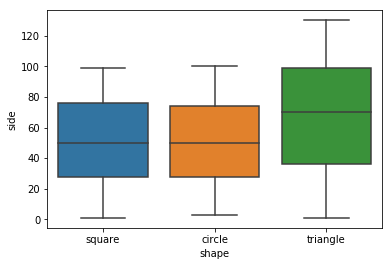

In [13]:
#8. Draw a boxplot showing the side size distribution for each shape - what can you infer from this plot?
sns.boxplot(x= 'shape', y ='side', data=d2)  

### Inference from above plot:
    * The sides of the triangle are more widely distributed than that of the circle and square
    * Variation in the sides and radius of the square and circle are comparable
    * Also, the side of the largest triangle is larger than the largest of circle and square
    * The median of circle's radius & square's side are both equivalent (50 units) and less than triangle's side (70 units)


Text(110,8000,'triangle')

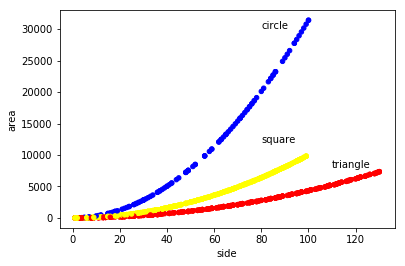

In [15]:
# 9. Make a scatter plot with "side" on the x axis, "area" on the y axis with a different color for each shape.
colors = {'circle': 'blue', 'triangle': 'red', 'square' : 'yellow'}
d2.plot(kind = 'scatter', x = 'side', y = 'area', c=d2['shape'].apply(lambda x: colors[x]))
plt.annotate('circle', xy=(80, 30000))
plt.annotate('square', xy=(80, 12000))
plt.annotate('triangle', xy=(110, 8000))

In [17]:
#10 Create a dataframe, table or list that show for each shape:
# a. The proportion of red objects within the shape
print('Proportion of red objects within the shape:')

df = {'shape':[], 'proportion_red': [], 'tot_shape': []}
for shape in d2[d2['color']=='red']['shape'].unique():
    df['shape'].append(shape)
    df['proportion_red'].append(len(d2[(d2['color']=='red') & (d2['shape']==shape)])/len(d2[d2['shape']==shape]))
    df['tot_shape'].append(len(d2[d2['shape']==shape]))
    
df = pd.DataFrame(df)
df

Proportion of red objects within the shape:


,shape,proportion_red,tot_shape
0,triangle,0.506203,403
1,square,0.117400,477
2,circle,0.250000,120


In [18]:
# 10 Create a dataframe, table or list that show for each shape:
# b. The proportion of blue area out of the shape's total area 

df = {'shape':[], 'blue_area_proportion':[] }
for shape in d2[d2['color']=='red']['shape'].unique():
    df['shape'].append(shape)
    df['blue_area_proportion'].append((d2['area'][(d2['color']=='blue')&(d2['shape']==shape)].sum())/(d2['area'][d2['shape']==shape].sum()))
df = pd.DataFrame(df)
df

,shape,blue_area_proportion
0,triangle,0.473886
1,square,0.360385
2,circle,0.061246


In [19]:
#11 Create a function that calculates 10. b. for a given shape and color
def color_proportion(data, shape, color):
    total_shape_area = data['area'][data['shape']==shape].sum()
    color_shape_area = data['area'][(data['color']==color) & (data['shape']==shape)].sum()
    return (color_shape_area/total_shape_area)

color_proportion(d2, 'circle', 'red')

0.3006362648792111

In [23]:
color_proportion(d2, 'circle', 'blue')

0.06124595429571636